In [22]:
import pandas as pd
import numpy as np
import pickle
import tabulate

In [2]:
dataset = pd.read_csv('dataset.csv')

with open('my_list.pkl', 'rb') as f:
    len_list = pickle.load(f)

In [3]:
dataset

,Time Stamps (s),Values,Labels,punc,dx_next,dx_prev,dy_next,dy_prev
0,0.535,0.0,M,0,0.160,1.000,0.0,0.0
1,0.695,0.0,M,0,0.200,0.160,-1.0,0.0
2,0.895,-1.0,L,0,0.130,0.200,0.0,-1.0
3,1.025,-1.0,L,0,0.230,0.130,0.0,0.0
4,1.255,-1.0,L,0,0.120,0.230,1.5,0.0
...,...,...,...,...,...,...,...,...
2387,65.225,-1.0,L,0,0.160,0.175,0.5,-1.0
2388,65.385,-0.5,M-L,0,0.235,0.160,0.0,0.5
2389,65.620,-0.5,M-L,0,0.140,0.235,-0.5,0.0
2390,65.760,-1.0,L,0,0.120,0.140,0.0,-0.5


In [4]:
len_list

[299, 299, 299, 299, 299, 299, 299, 299]

In [10]:
no_end = dataset[dataset["punc"]==0]
end_phrase = dataset[dataset["punc"]==1]

In [45]:
# Create descriptive statistics for each column
dx_next_stats = end_phrase["dx_next"].describe()
dx_prev_stats = end_phrase["dx_prev"].describe()
dy_next_stats = end_phrase["dy_next"].describe()
dy_prev_stats = end_phrase["dy_prev"].describe()

# Create a DataFrame from the descriptive statistics
stats_df = pd.DataFrame({
    'dx_next': dx_next_stats,
    'dx_prev': dx_prev_stats,
    'dy_next': dy_next_stats,
    'dy_prev': dy_prev_stats
})

# Display the resulting DataFrame
stats_df = stats_df[1:]

In [46]:
# Create descriptive statistics for each column
dx_next_stats = no_end["dx_next"].describe()
dx_prev_stats = no_end["dx_prev"].describe()
dy_next_stats = no_end["dy_next"].describe()
dy_prev_stats = no_end["dy_prev"].describe()

# Create a DataFrame from the descriptive statistics
stats_df_no = pd.DataFrame({
    'dx_next_no': dx_next_stats,
    'dx_prev_no': dx_prev_stats,
    'dy_next_no': dy_next_stats,
    'dy_prev_no': dy_prev_stats
})

# Display the resulting DataFrame
stats_df_no = stats_df_no[1:]

In [47]:
concatenated_df = pd.concat([stats_df, stats_df_no], axis=1)
concatenated_df

,dx_next,dx_prev,dy_next,dy_prev,dx_next_no,dx_prev_no,dy_next_no,dy_prev_no
mean,0.300085,0.394746,0.110169,0.228814,0.219912,0.217518,-0.003215,-0.006215
std,0.311526,0.411071,0.754685,0.811140,0.232735,0.227509,0.640683,0.638146
min,0.065000,0.045000,-1.000000,-1.000000,0.040000,0.040000,-2.000000,-2.000000
25%,0.120000,0.137500,-0.250000,-0.250000,0.105000,0.105000,-0.500000,-0.500000
50%,0.160000,0.180000,0.000000,0.000000,0.145000,0.145000,0.000000,0.000000
75%,0.245000,0.597500,0.500000,1.000000,0.205000,0.200000,0.000000,0.000000
max,1.085000,1.680000,2.000000,2.000000,1.680000,1.680000,2.000000,2.000000


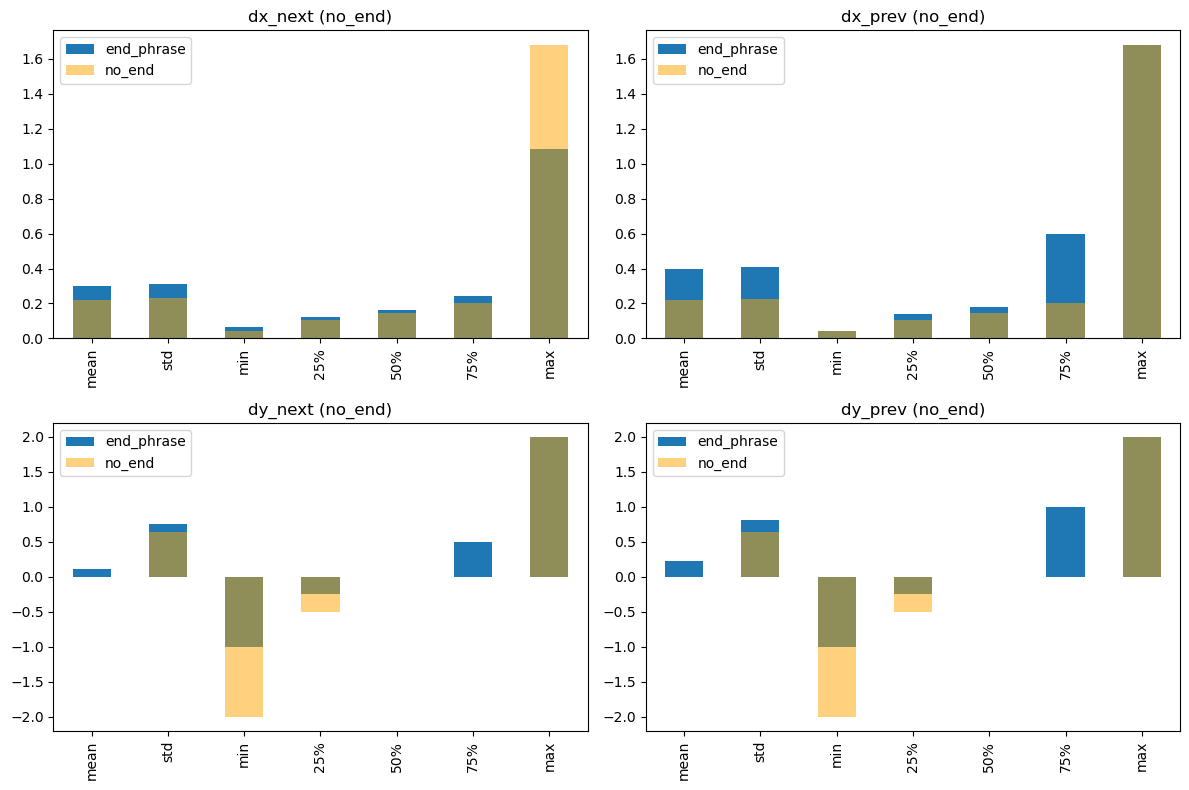

In [49]:
# Compare corresponding statistical features of each DataFrame using bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

stats_df['dx_next'].plot(kind='bar', ax=axes[0, 0], title='dx_next', label='end_phrase')
stats_df_no['dx_next_no'].plot(kind='bar', ax=axes[0, 0], title='dx_next (no_end)', alpha=0.5, color='orange', label='no_end')
axes[0, 0].legend()

stats_df['dx_prev'].plot(kind='bar', ax=axes[0, 1], title='dx_prev', label='end_phrase')
stats_df_no['dx_prev_no'].plot(kind='bar', ax=axes[0, 1], title='dx_prev (no_end)', alpha=0.5, color='orange', label='no_end')
axes[0, 1].legend()

stats_df['dy_next'].plot(kind='bar', ax=axes[1, 0], title='dy_next', label='end_phrase')
stats_df_no['dy_next_no'].plot(kind='bar', ax=axes[1, 0], title='dy_next (no_end)', alpha=0.5, color='orange', label='no_end')
axes[1, 0].legend()

stats_df['dy_prev'].plot(kind='bar', ax=axes[1, 1], title='dy_prev', label='end_phrase')
stats_df_no['dy_prev_no'].plot(kind='bar', ax=axes[1, 1], title='dy_prev (no_end)', alpha=0.5, color='orange', label='no_end')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
